## APS_SENSOR_DETECTION

# 1)PROBLEM STATEMENT
Data: Sensor Data

Problem statement :

The Air Pressure System (APS) is a critical subsystem in heavy-duty vehicles, responsible for generating pressurized air used in essential operations such as braking and gear changes. Failures within the APS can lead to significant operational disruptions and maintenance costs. The dataset under consideration categorizes failures into two classes: the positive class represents failures directly linked to APS components, while the negative class pertains to failures in other vehicle systems.

A primary issue arises when misclassifications occur during failure diagnosis. False positives (Cost_1) result in unnecessary inspections or repairs at a cost of 10 units per instance. In contrast, false negatives (Cost_2) lead to undetected APS faults, which can cause vehicle breakdowns and incur a much higher cost of 500 units per instance. These costs highlight the critical need to prioritize minimizing false negatives, as they contribute disproportionately to the overall cost.

The total cost of the prediction model is calculated as:
Total Cost
=
(
Cost
1
×
Number of Type 1 Instances
)
+
(
Cost
2
×
Number of Type 2 Instances
)
Total Cost=(Cost
1
​
 ×Number of Type 1 Instances)+(Cost
2
​
 ×Number of Type 2 Instances)

The project must address several key challenges:

Handling Null Values: The dataset contains significant null values in multiple columns, requiring robust preprocessing techniques.
Cost Sensitivity: A heavy emphasis is placed on minimizing false negatives due to their high associated costs.
No Latency Constraints: The system does not require low-latency predictions, enabling the focus to be on accuracy and robustness.
Reduced Interpretability Requirement: The model does not need to prioritize explainability, allowing the use of complex techniques if necessary.
Misclassification Impact: Misclassifications directly lead to unnecessary repair costs or breakdown risks.
This project aims to design and implement a machine learning solution that accurately distinguishes between APS-related and non-APS-related failures, reducing the total cost by minimizing false negatives and optimizing maintenance operations.









# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import  mean
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer,LabelEncoder,StandardScaler, MinMaxScaler,RobustScaler,OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

# Reading the data

In [2]:
df=pd.read_csv("C:\\Users\\MANAV\\Desktop\\codes\\predictive-maintenance-for-air-pressure-system-aps\\aps_failure_training_set1.csv",na_values="na")
df


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
df.shape

(36188, 171)

In [4]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [5]:
df.isna().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [6]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.618800e+04,8292.000000,3.404700e+04,2.698800e+04,34601.000000,34601.000000,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,...,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,34458.000000,34459.000000
mean,6.591016e+04,0.711770,3.535223e+08,3.185447e+05,7.234300,11.606543,1.952347e+02,1.508277e+03,1.250718e+04,1.156928e+05,...,4.853621e+05,2.293208e+05,4.837846e+05,4.401019e+05,3.686943e+05,3.718051e+05,1.485117e+05,8.897664e+03,0.083464,0.209234
std,1.641238e+05,3.054033,7.926486e+08,5.225398e+07,186.437282,234.405353,1.852862e+04,4.371360e+04,1.801543e+05,8.853380e+05,...,1.254188e+06,5.948054e+05,1.251106e+06,1.331837e+06,1.220688e+06,1.722483e+06,5.153265e+05,5.316375e+04,3.789020,8.613915
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.660000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.986000e+03,1.190000e+03,2.732000e+03,3.680000e+03,5.660000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.102600e+04,0.000000,1.520000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.378500e+05,1.137840e+05,2.263560e+05,1.952480e+05,9.559400e+04,4.296600e+04,4.278000e+03,0.000000e+00,0.000000,0.000000
75%,5.006850e+04,0.000000,9.640000e+02,4.320000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.470120e+05,2.222860e+05,4.748680e+05,4.103280e+05,2.791920e+05,1.706080e+05,1.432300e+05,2.018000e+03,0.000000,0.000000
max,2.746564e+06,100.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.676929e+07,2.747758e+07,5.743524e+07,3.160781e+07,3.727856e+07,1.926740e+07,3.810078e+06,362.000000,1146.000000


## EDA

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

# Checking missing **values**

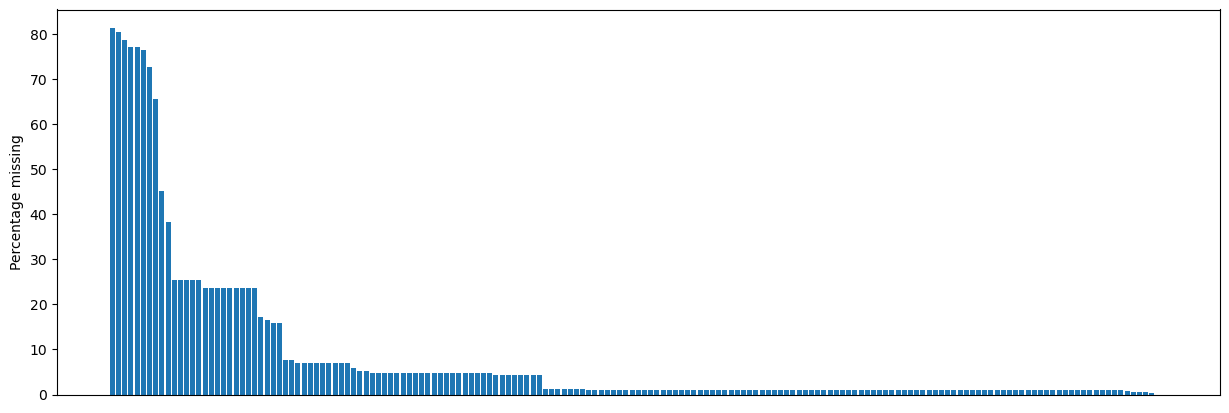

In [8]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [9]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]

# Strip potential leading/trailing spaces from column names
columns_to_drop = [col.strip() for col in dropcols.index]

# Check if columns exist before dropping
existing_columns = [col for col in columns_to_drop if col in df.columns]

df.drop(columns=existing_columns, inplace=True)

In [10]:
# Check shape of the dataset after dropping columns
df.shape

(36188, 164)

In [11]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 5.37059852747306%


# Positive negative count

Positive: 1000, Negative: 35188


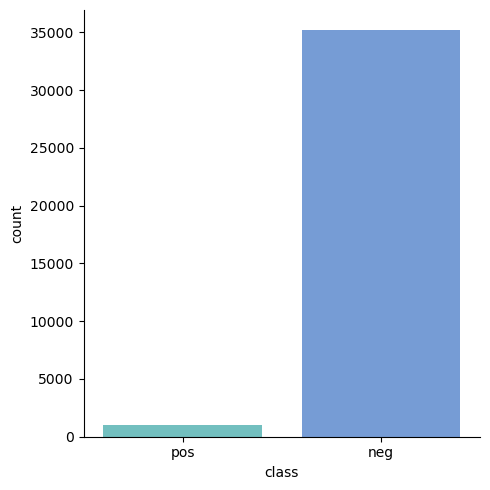

In [12]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="class", kind="count", palette="winter_r", alpha=.6)
plt.show()

# Plot Distribution of all independent numerical variables

Column 'ab_000' not found in DataFrame, skipping plot.
Column 'bn_000' not found in DataFrame, skipping plot.
Column 'bo_000' not found in DataFrame, skipping plot.
Column 'bp_000' not found in DataFrame, skipping plot.
Column 'bq_000' not found in DataFrame, skipping plot.
Column 'br_000' not found in DataFrame, skipping plot.
Column 'cr_000' not found in DataFrame, skipping plot.


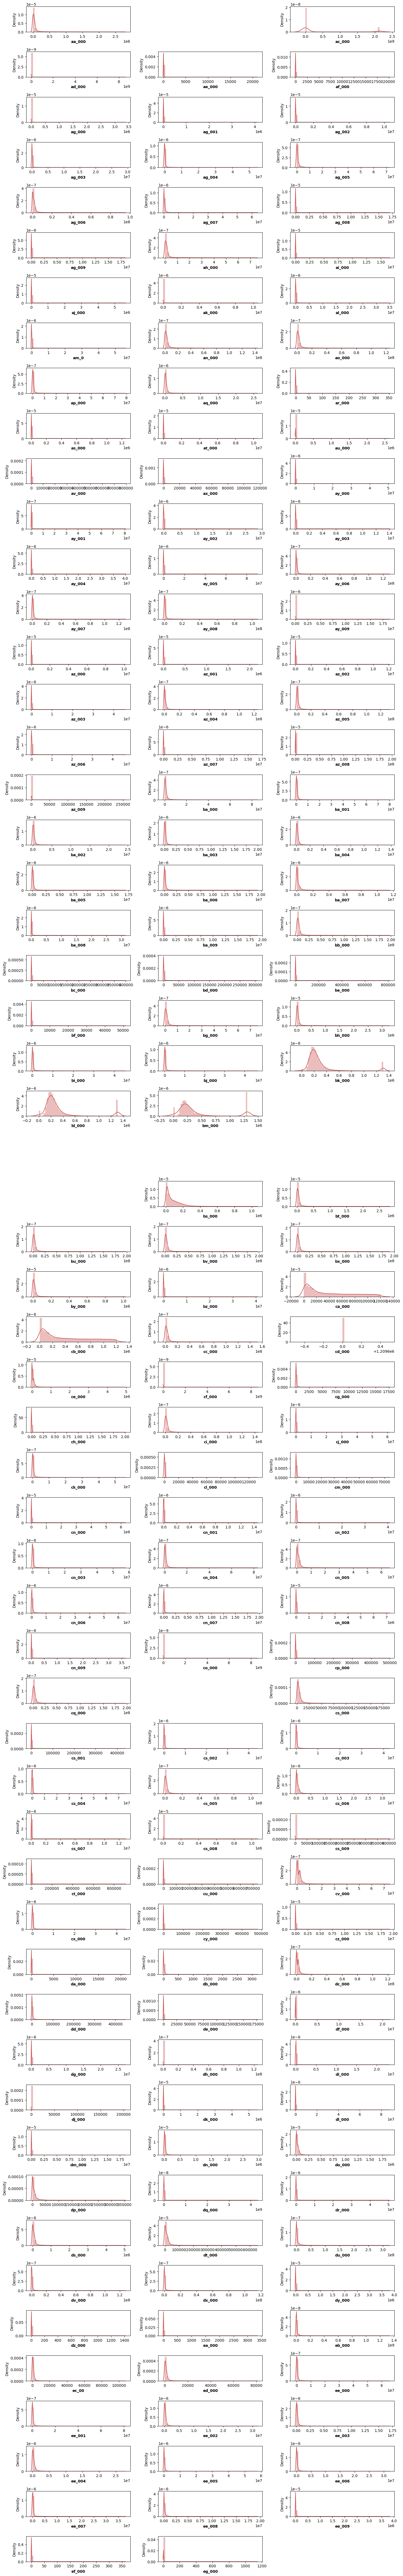

In [13]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    if col in df.columns:
        plt.subplot(60, 3, i+1)
        sns.distplot(x=df[col], color='indianred')
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
    else:
        print(f"Column '{col}' not found in DataFrame, skipping plot.")

### EDA CONCLUSION
After conducting Exploratory Data Analysis (EDA), it became evident that the target classes in the dataset are highly imbalanced. Specifically, the number of instances in the negative class (majority class) is significantly greater than those in the positive class (minority class). Class imbalance is a critical issue as it can lead to biased model predictions, where the classifier disproportionately favors the majority class, resulting in poor performance on the minority class.

To address this challenge and ensure that the model can accurately predict both classes, it is essential to apply methods specifically designed for handling class imbalance.

Why Class Imbalance Matters
Class imbalance can degrade the performance of the predictive model in the following ways:

Misleading Metrics: Metrics like accuracy may appear high but fail to reflect the model’s poor performance on the minority class.
Model Bias: The classifier may overlook the minority class, leading to high false negatives or false positives.
Real-World Implications: In this dataset, misclassifications can have significant cost implications, with false negatives being 50 times costlier than false positives.
Techniques to Handle Class Imbalance
Oversampling:

Increase the number of samples in the minority class to balance the dataset.
Synthetic Minority Oversampling Technique (SMOTE) will be used to generate synthetic samples rather than duplicating existing ones. SMOTE helps create variability and reduces the risk of overfitting.
Undersampling:

Reduce the number of samples in the majority class by randomly removing instances.
While effective, undersampling may lead to information loss, so it will be considered carefully based on data characteristics.
Hybrid Techniques:

Combining SMOTE with techniques like Tomek Links or Edited Nearest Neighbors (ENN) to clean redundant samples and refine the balanced dataset.
Cost-Sensitive Learning:

Assign higher penalties to false negatives to address the significant cost disparity outlined in the problem statement.
This will ensure that the model focuses more on correctly predicting the minority class.
Ensemble Techniques:

Use advanced ensemble models like XGBoost or Random Forest, which inherently handle class imbalance by assigning weights to the classes.
Conclusion
The chosen approach will depend on the insights derived from EDA and the evaluation of model performance using appropriate metrics such as precision, recall, F1-score, and AUC-ROC. By effectively addressing the class imbalance, the predictive model will ensure accurate classification of both classes, reduce unnecessary repair costs, and optimize overall performance.

In [14]:
# Splitting X and y for all Experiments
X= df.drop('class', axis=1)
y = df['class']
y= y.replace({'pos': 1, 'neg': 0})

# Creating function for model training and evaluations

In [15]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [16]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification

    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [17]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    cost_list=[]
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

    return report

## Experiment -1 KNN Imputer for null valus

In [18]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [19]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7289)
n_neighbors= 3 || accuracy (0.7357)
n_neighbors= 5 || accuracy (0.7326)
n_neighbors= 7 || accuracy (0.7118)
n_neighbors= 9 || accuracy (0.7202)


**Pipeline for KNN Imputer**

In [20]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [21]:
X_knn =knn_pipeline.fit_transform(X)

### Using SMOKE+TOMEK LINKS for handling imbalanced data

In [22]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [23]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [24]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9926
- F1 score: 0.9926
- Precision: 0.9888
- Recall: 0.9964
- Roc Auc Score: 0.9926
- COST: 13290.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9865
- F1 score: 0.9865
- Precision: 0.9815
- Recall: 0.9916
- Roc Auc Score: 0.9865
- COST: 30810.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9803
- Recall: 0.9878
- Roc Auc Score: 0.9840
- COST: 177060.
----------------------------------
Model performance for Test set
- Accuracy: 0.9843
- F1 score: 0.9843
- Precision: 0.9810
- Recall: 0.9876
- Roc Auc

In [25]:
report_knn

,Model Name,Cost
5,XGBClassifier,3480
6,CatBoosting Classifier,8590
0,Random Forest,13290
1,Decision Tree,30810
4,K-Neighbors Classifier,39850
2,Gradient Boosting,44840
7,AdaBoost Classifier,83290
3,Logistic Regression,306730


**Insights**
- For the Experiment 1: Knn imputer has XGBoost classifier as the best Model

# Experiment 2- Simple Imputer with Strategy mean

In [26]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [27]:
X_mean = mean_pipeline.fit_transform(X)

In [28]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [29]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9942
- F1 score: 0.9941
- Precision: 0.9901
- Recall: 0.9981
- Roc Auc Score: 0.9942
- COST: 7190.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9866
- F1 score: 0.9865
- Precision: 0.9839
- Recall: 0.9890
- Roc Auc Score: 0.9866
- COST: 39120.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9856
- F1 score: 0.9857
- Precision: 0.9828
- Recall: 0.9886
- Roc Auc Score: 0.9856
- COST: 164880.
----------------------------------
Model performance for Test set
- Accuracy: 0.9865
- F1 score: 0.9863
- Precision: 0.9835
- Recall: 0.9892
- Roc Auc 

In [30]:
report_mean

,Model Name,Cost
5,XGBClassifier,1930
6,CatBoosting Classifier,5930
0,Random Forest,7190
2,Gradient Boosting,38650
1,Decision Tree,39120
4,K-Neighbors Classifier,44770
7,AdaBoost Classifier,90980
3,Logistic Regression,305130


### Experiment 3- Simple Imputer with Strategy Median

In [31]:
# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [32]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [33]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [34]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9913
- F1 score: 0.9914
- Precision: 0.9864
- Recall: 0.9965
- Roc Auc Score: 0.9913
- COST: 13470.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9869
- F1 score: 0.9871
- Precision: 0.9815
- Recall: 0.9926
- Roc Auc Score: 0.9868
- COST: 27320.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9813
- Recall: 0.9867
- Roc Auc Score: 0.9840
- COST: 190760.
----------------------------------
Model performance for Test set
- Accuracy: 0.9809
- F1 score: 0.9812
- Precision: 0.9755
- Recall: 0.9868
- Roc Auc

In [35]:
report_median

,Model Name,Cost
5,XGBClassifier,6100
6,CatBoosting Classifier,6790
0,Random Forest,13470
1,Decision Tree,27320
2,Gradient Boosting,48250
4,K-Neighbors Classifier,54430
7,AdaBoost Classifier,87120
3,Logistic Regression,294570


# Experiment 4- Simple imputer with constant

In [36]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [37]:
X_const =constant_pipeline.fit_transform(X)

In [38]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [39]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9933
- F1 score: 0.9933
- Precision: 0.9901
- Recall: 0.9966
- Roc Auc Score: 0.9933
- COST: 12700.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9877
- F1 score: 0.9879
- Precision: 0.9815
- Recall: 0.9943
- Roc Auc Score: 0.9877
- COST: 21320.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9829
- F1 score: 0.9829
- Precision: 0.9798
- Recall: 0.9861
- Roc Auc Score: 0.9829
- COST: 200690.
----------------------------------
Model performance for Test set
- Accuracy: 0.9806
- F1 score: 0.9807
- Precision: 0.9773
- Recall: 0.9842
- Roc Auc

In [40]:
report_const

,Model Name,Cost
5,XGBClassifier,2960
6,CatBoosting Classifier,3970
0,Random Forest,12700
1,Decision Tree,21320
4,K-Neighbors Classifier,43200
2,Gradient Boosting,57110
7,AdaBoost Classifier,98790
3,Logistic Regression,115590


# Experiment 5- MICE IMPUTER ALGORITHM

In [42]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  random_state=1989
)# Run the MICE algorithm for 3 iterations kernel.mice(3)

In [43]:
X_mice = kernel.complete_data()

In [44]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [45]:
# Fit X with Mice imputer
X_mice= mice_pipeline.fit_transform(X_mice)

In [46]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [47]:
# Training the models
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9888
- F1 score: 0.9889
- Precision: 0.9823
- Recall: 0.9956
- Roc Auc Score: 0.9888
- COST: 16760.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9824
- F1 score: 0.9825
- Precision: 0.9758
- Recall: 0.9893
- Roc Auc Score: 0.9824
- COST: 39220.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9848
- F1 score: 0.9848
- Precision: 0.9819
- Recall: 0.9878
- Roc Auc Score: 0.9848
- COST: 176600.
----------------------------------
Model performance for Test set
- Accuracy: 0.9802
- F1 score: 0.9804
- Precision: 0.9739
- Recall: 0.9870
- Roc Auc

In [48]:
report_mice

,Model Name,Cost
5,XGBClassifier,9170
6,CatBoosting Classifier,15190
0,Random Forest,16760
1,Decision Tree,39220
2,Gradient Boosting,47360
4,K-Neighbors Classifier,54870
7,AdaBoost Classifier,91890
3,Logistic Regression,170740


# Experiment 6- Principle componet analysis (pca) with imputing median

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [51]:
X_pca = pca_pipeline.fit_transform(X)

In [52]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,150):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<Axes: >

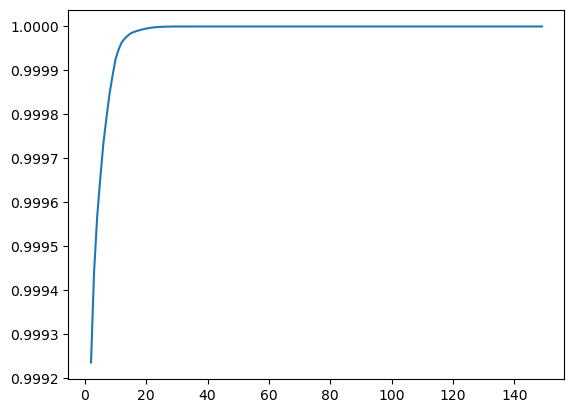

In [53]:
# plotting variance ratio
pd.Series(var_ratio).plot()

In [54]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


<Figure size 500x500 with 0 Axes>

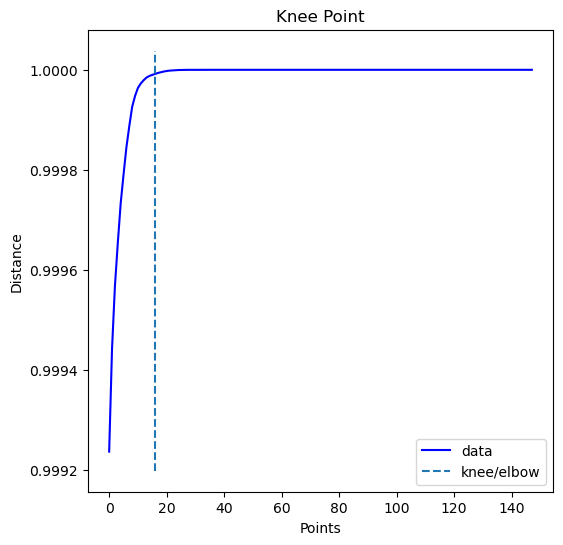

Knee Locator k = 18


In [55]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [56]:
# Reducing the dimensions of the data
pca_final=PCA(n_components=18,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [57]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [58]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9987
- Precision: 1.0000
- Recall: 0.9975
- Roc Auc Score: 0.9987
- COST: 35010.
----------------------------------
Model performance for Test set
- Accuracy: 0.9837
- F1 score: 0.9838
- Precision: 0.9782
- Recall: 0.9894
- Roc Auc Score: 0.9837
- COST: 38540.


Decision Tree
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9987
- Precision: 1.0000
- Recall: 0.9975
- Roc Auc Score: 0.9987
- COST: 35000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9738
- F1 score: 0.9740
- Precision: 0.9681
- Recall: 0.9800
- Roc Auc Score: 0.9738
- COST: 72260.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9409
- F1 score: 0.9407
- Precision: 0.9441
- Recall: 0.9373
- Roc Auc Score: 0.9409
- COST: 891510.
----------------------------------
Model performance for Test set
- Accuracy: 0.9394
- F1 score: 0.9393
- Precision: 0.9410
- Recall: 0.9377
-

In [59]:
report_pca

,Model Name,Cost
0,Random Forest,38540
5,XGBClassifier,58440
6,CatBoosting Classifier,67270
1,Decision Tree,72260
4,K-Neighbors Classifier,83290
2,Gradient Boosting,222110
7,AdaBoost Classifier,298440
3,Logistic Regression,710400


# Final model

In [60]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","2950"])
pt.add_row(["XGBClassifier","Mice","3510"])
pt.add_row(["XGBClassifier","Knn-Imputer","4460"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","4950"])
pt.add_row(["CatBoostClassifier","Median","5760"])
pt.add_row(["Random Forest","PCA","34150"])
print(pt)

+--------------------+-------------------------+------------+
|       Model        |    Imputation_method    | Total_cost |
+--------------------+-------------------------+------------+
|   XGBClassifier    | Simple Imputer-Constant |    2950    |
|   XGBClassifier    |           Mice          |    3510    |
|   XGBClassifier    |       Knn-Imputer       |    4460    |
|   XGBClassifier    |   Simple Imputer-Mean   |    4950    |
| CatBoostClassifier |          Median         |    5760    |
|   Random Forest    |           PCA           |   34150    |
+--------------------+-------------------------+------------+


**Report**
- From the final report we can see than XGBClassifier with Simple imputer with strategy constant has performed the best with cost of 2950

In [61]:
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [63]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final XGBoost Classifier Accuracy Score (Train) : 1.0
Final XGBoost Classifier Accuracy Score (Test) : 0.9963638956224156
Final XGBoost Classifier Cost Metric(Test) : 2960


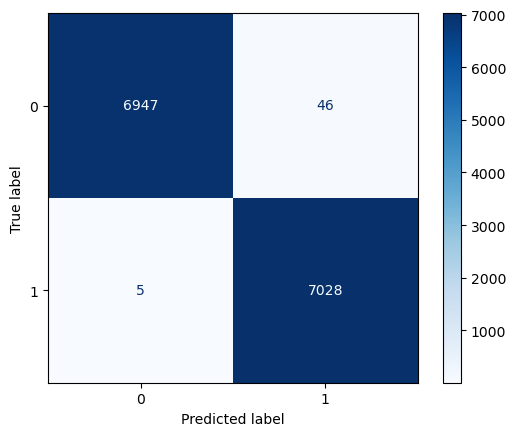

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, final_model.predict(X_test))
# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.show()

## The best Model is XGBoost Classifier with 99.6% accuracy and cost of 2950

In [66]:
import pickle
import os
# Save model
pickle_file = "APS_MODEL.pkl"
with open('pickle_file', 'wb') as f:
    pickle.dump(final_model, f)
print(f"Model saved using pickle at: {os.path.abspath(pickle_file)}")

Model saved using pickle at: C:\Users\MANAV\Desktop\codes\predictive-maintenance-for-air-pressure-system-aps\APS_MODEL.pkl
